In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define data types for memory optimization
dtype_map = {
    'trip_id': 'category',
    'fruit_cate': 'category',
    'Route': 'category',
    'class': 'category',
    'failure_scenario': 'category',
    'speed_knots': 'float32',
    'temp': 'float32',
    'humid': 'float32',
    'co2': 'float32',
    'light': 'float32',
    'temperature_C': 'float32',
    'humidity_%': 'float32',
    'dew_point_C': 'float32',
    'pressure_hPa': 'float32',
    'wind_speed_kmh': 'float32',
    'precipitation_mm': 'float32'
}

# Define columns to parse as datetime
parse_cols = ['timestamp']

# Define list of CSV files to load
files = ['Iot_part1.csv', 'Iot_part2.csv', 'Iot_part3.csv', 'Iot_part4.csv', 'IOT.csv']

In [3]:
# Load and combine all CSV files
dataframes = []

for file in files:
    try:
        print(f"Loading {file}...")
        df_temp = pd.read_csv(
            file,
            dtype=dtype_map,
            parse_dates=parse_cols,
            low_memory=False
        )
        dataframes.append(df_temp)
        print(f"✓ Successfully loaded {file} - Shape: {df_temp.shape}")
    except FileNotFoundError:
        print(f"✗ File not found: {file}")
    except Exception as e:
        print(f"✗ Error loading {file}: {str(e)}")

# Combine all dataframes
if dataframes:
    df = pd.concat(dataframes, ignore_index=True)
    print(f"\n{'='*60}")
    print(f"Successfully combined {len(dataframes)} files")
    print(f"{'='*60}")
else:
    print("No dataframes were loaded successfully!")
    df = None

Loading Iot_part1.csv...
✓ Successfully loaded Iot_part1.csv - Shape: (9010878, 19)
Loading Iot_part2.csv...
✓ Successfully loaded Iot_part2.csv - Shape: (8619798, 19)
Loading Iot_part3.csv...
✓ Successfully loaded Iot_part3.csv - Shape: (6063100, 19)
Loading Iot_part4.csv...
✓ Successfully loaded Iot_part4.csv - Shape: (8591130, 19)
Loading IOT.csv...
✓ Successfully loaded IOT.csv - Shape: (10958389, 19)

Successfully combined 5 files


Text(0.5, 1.0, 'Class Distribution')

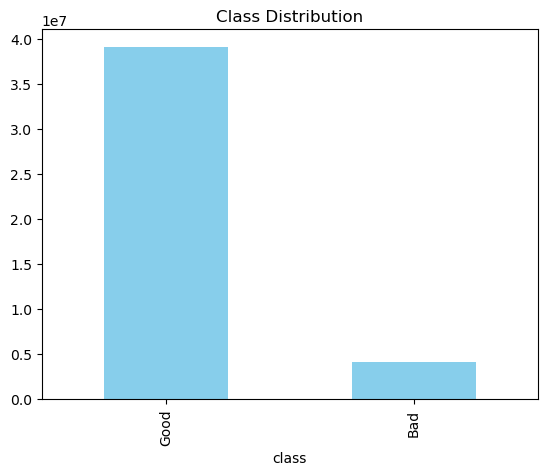

In [5]:
df['class'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')

In [4]:
df.head()

,timestamp,temp,humid,co2,light,class,trip_id,fruit_cate,latitude,longitude,speed_knots,Route,temperature_C,humidity_%,dew_point_C,pressure_hPa,wind_speed_kmh,precipitation_mm,failure_scenario
0,2024-02-01 22:25:52+00:00,24.944977,89.257713,350.970184,20.473862,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.299988,8.4,0.0,GOOD
1,2024-02-01 22:35:52+00:00,24.930126,88.937927,351.754242,17.989037,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.299988,8.4,0.0,GOOD
2,2024-02-01 22:45:52+00:00,25.082836,88.535408,352.571625,20.079832,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.299988,8.4,0.0,GOOD
3,2024-02-01 22:55:52+00:00,25.067486,88.786102,353.393188,19.468184,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.299988,8.4,0.0,GOOD
4,2024-02-01 23:05:52+00:00,25.109032,88.616013,354.223053,20.142464,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.299988,8.4,0.0,GOOD


In [4]:
# Display basic info
print(f"Combined dataframe shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
df.info()

Combined dataframe shape: (43243295, 19)
Memory usage: 10362.02 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43243295 entries, 0 to 43243294
Data columns (total 19 columns):
 #   Column            Dtype   
---  ------            -----   
 0   timestamp         object  
 1   temp              float32 
 2   humid             float32 
 3   co2               float32 
 4   light             float32 
 5   class             category
 6   trip_id           object  
 7   fruit_cate        category
 8   latitude          float64 
 9   longitude         float64 
 10  speed_knots       float32 
 11  Route             category
 12  temperature_C     float32 
 13  humidity_%        float32 
 14  dew_point_C       float32 
 15  pressure_hPa      float32 
 16  wind_speed_kmh    float32 
 17  precipitation_mm  float32 
 18  failure_scenario  category
dtypes: category(4), float32(11), float64(2), object(2)
memory usage: 3.2+ GB


In [5]:
# Check missing values
df.dropna(how='all', inplace=True)
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
timestamp               0
temp                13658
humid                9068
co2                  5215
light                   0
class                   0
trip_id                 0
fruit_cate              0
latitude                0
longitude               0
speed_knots             0
Route                   0
temperature_C       58438
humidity_%          58438
dew_point_C         58438
pressure_hPa        58438
wind_speed_kmh      58438
precipitation_mm    58438
failure_scenario        0
dtype: int64


In [7]:
# Check duplicates on key columns (more memory efficient)
key_columns = ['timestamp', 'trip_id', 'temp', 'humid', 'co2', 'light', 'Route']
print(f"Duplicate rows (based on key columns): {df.duplicated(subset=key_columns).sum()}")

Duplicate rows (based on key columns): 0


In [8]:
# Check for duplicate timestamps per trip
print("\nDuplicate timestamps per trip_id:")
print(df.groupby('trip_id')['timestamp'].apply(lambda x: x.duplicated().sum()))


Duplicate timestamps per trip_id:
trip_id
TRIP_00002    0
TRIP_00029    0
TRIP_00030    0
TRIP_00031    0
TRIP_00034    0
             ..
TRIP_99962    0
TRIP_99964    0
TRIP_99970    0
TRIP_99988    0
TRIP_99994    0
Name: timestamp, Length: 14699, dtype: int64


In [9]:
# Create dataframe with distinct trip_id and their failure_scenario and fruit_cate
trip_summary = df.groupby('trip_id').agg({
    'failure_scenario': 'first',  # Assuming one failure scenario per trip
    'fruit_cate': 'first'          # Assuming one fruit category per trip
}).reset_index()

Failure Scenario Distribution (by unique trips):
failure_scenario
GOOD                   10385
OVER_VENTILATION         940
SATURATED_HEAT_FAIL      922
TEMP_FAIL                627
HOT_HUMID_FAIL           622
DOOR_AJAR                609
LIGHT_EXPOSURE           594
Name: count, dtype: int64

Total unique trips: 14699


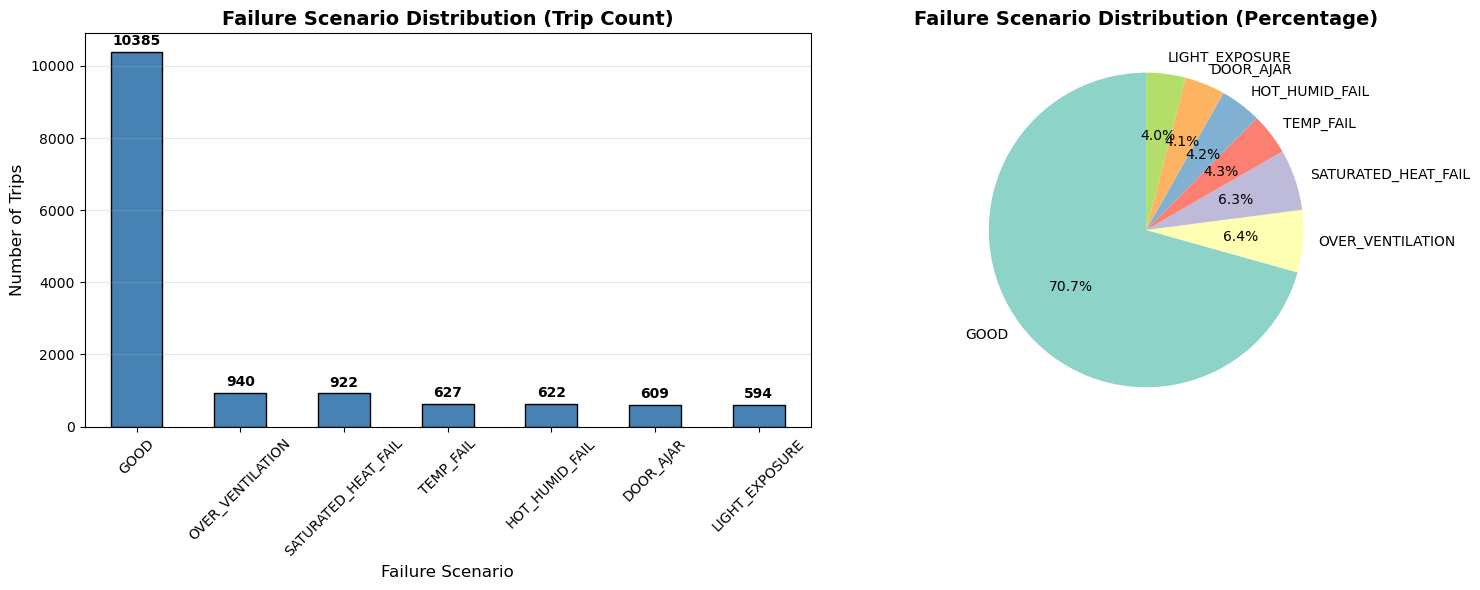


Percentage distribution:
failure_scenario
GOOD                   70.65
OVER_VENTILATION        6.39
SATURATED_HEAT_FAIL     6.27
TEMP_FAIL               4.27
HOT_HUMID_FAIL          4.23
DOOR_AJAR               4.14
LIGHT_EXPOSURE          4.04
Name: count, dtype: float64


In [10]:
# Distribution of failure scenarios by trip count
failure_counts = trip_summary['failure_scenario'].value_counts().sort_values(ascending=False)

print("Failure Scenario Distribution (by unique trips):")
print(failure_counts)
print(f"\nTotal unique trips: {len(trip_summary)}")

# Create bar plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
failure_counts.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Failure Scenario Distribution (Trip Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Failure Scenario', fontsize=12)
axes[0].set_ylabel('Number of Trips', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(failure_counts):
    axes[0].text(i, v + max(failure_counts)*0.01, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = plt.cm.Set3(range(len(failure_counts)))
axes[1].pie(failure_counts, labels=failure_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 10})
axes[1].set_title('Failure Scenario Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional statistics
print("\nPercentage distribution:")
print((failure_counts / len(trip_summary) * 100).round(2))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13828\436036877.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  failure_by_fruit = trip_summary.groupby(['fruit_cate', 'failure_scenario']).size().unstack(fill_value=0)


Failure Scenario Distribution by Fruit Category (%):
failure_scenario  DOOR_AJAR       GOOD  HOT_HUMID_FAIL  LIGHT_EXPOSURE  \
fruit_cate                                                               
Banana             0.000000  74.669900        0.000000        0.000000   
Orange            16.544417  66.422168        0.000000        0.000000   
Pineapple          0.000000  74.217002        0.000000        0.000000   
Tomato             0.000000  67.408202       16.671134       15.920665   

failure_scenario  OVER_VENTILATION  SATURATED_HEAT_FAIL  TEMP_FAIL  
fruit_cate                                                          
Banana                     25.3301             0.000000   0.000000  
Orange                      0.0000             0.000000  17.033415  
Pineapple                   0.0000            25.782998   0.000000  
Tomato                      0.0000             0.000000   0.000000  


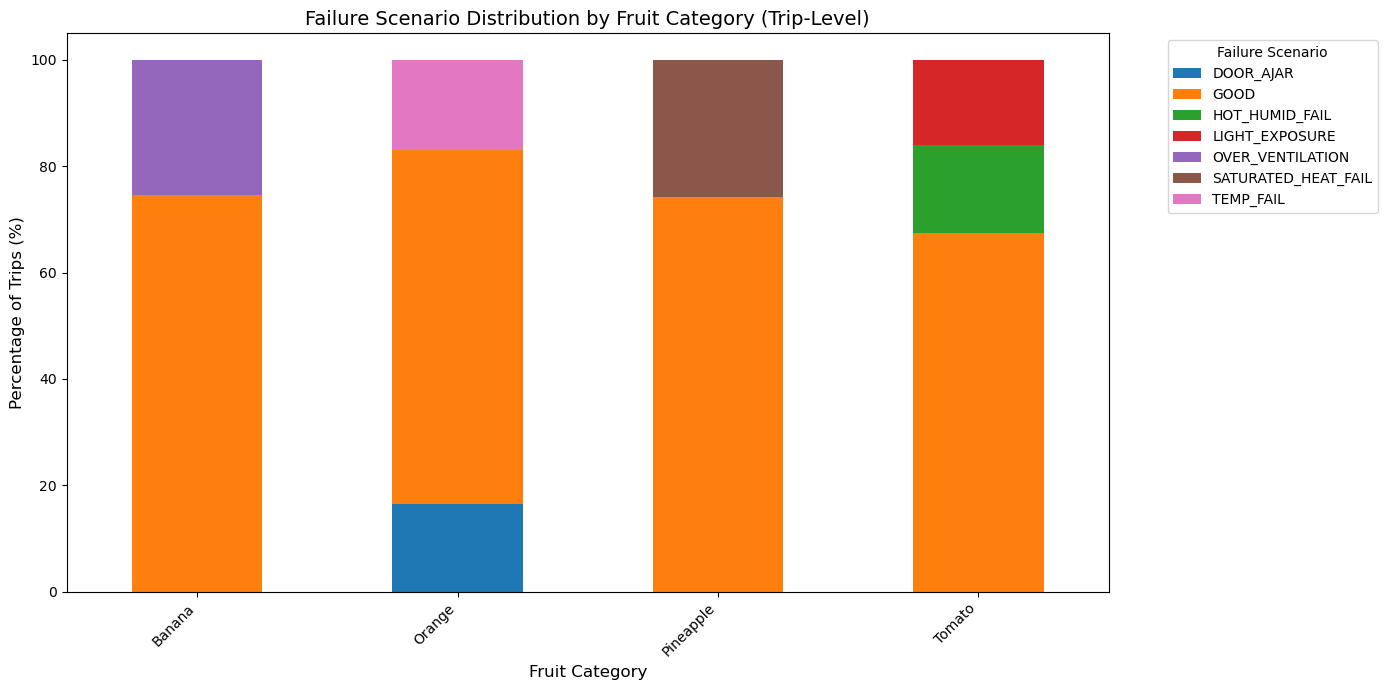


Absolute counts:
failure_scenario  DOOR_AJAR  GOOD  HOT_HUMID_FAIL  LIGHT_EXPOSURE  \
fruit_cate                                                          
Banana                    0  2771               0               0   
Orange                  609  2445               0               0   
Pineapple                 0  2654               0               0   
Tomato                    0  2515             622             594   

failure_scenario  OVER_VENTILATION  SATURATED_HEAT_FAIL  TEMP_FAIL  
fruit_cate                                                          
Banana                         940                    0          0  
Orange                           0                    0        627  
Pineapple                        0                  922          0  
Tomato                           0                    0          0  

Total trips analyzed: 14699


In [11]:
# Failure rates by fruit category using trip_summary
failure_by_fruit = trip_summary.groupby(['fruit_cate', 'failure_scenario']).size().unstack(fill_value=0)
failure_by_fruit_pct = failure_by_fruit.div(failure_by_fruit.sum(axis=1), axis=0) * 100

print("Failure Scenario Distribution by Fruit Category (%):")
print(failure_by_fruit_pct)

# Visualize
failure_by_fruit_pct.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Failure Scenario Distribution by Fruit Category (Trip-Level)', fontsize=14)
plt.xlabel('Fruit Category', fontsize=12)
plt.ylabel('Percentage of Trips (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Failure Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Print count summary
print("\nAbsolute counts:")
print(failure_by_fruit)
print(f"\nTotal trips analyzed: {len(trip_summary)}")

In [ ]:
# Get 200 trip_ids for each failure_scenario
selected_trip_ids = []

for scenario in df['failure_scenario'].unique():
    scenario_trip_ids = df[df['failure_scenario'] == scenario]['trip_id'].unique()[:200]
    selected_trip_ids.extend(scenario_trip_ids)

# Filter dataframe to include only records from selected trip_ids
df_filtered = df[df['trip_id'].isin(selected_trip_ids)].copy()

# Display summary
print("Trip_ids selected per failure_scenario:")
for scenario in df['failure_scenario'].unique():
    count = len(df[df['failure_scenario'] == scenario]['trip_id'].unique()[:200])
    print(f"  {scenario}: {count}")

print(f"\nTotal selected trip_ids: {len(selected_trip_ids)}")
print(f"Total records in filtered dataframe: {len(df_filtered)}")
print(f"\nFiltered dataframe shape: {df_filtered.shape}")

# Verify the distribution
print("\nFailure scenario distribution in filtered data:")
print(df_filtered.groupby('trip_id')['failure_scenario'].first().value_counts())

Trip_ids selected per failure_scenario:
  GOOD: 150
  SATURATED_HEAT_FAIL: 150
  HOT_HUMID_FAIL: 150
  OVER_VENTILATION: 150
  LIGHT_EXPOSURE: 150
  DOOR_AJAR: 150
  TEMP_FAIL: 150

Total selected trip_ids: 1400
Total records in filtered dataframe: 4158506

Filtered dataframe shape: (4158506, 19)

Failure scenario distribution in filtered data:
failure_scenario
DOOR_AJAR              200
GOOD                   200
HOT_HUMID_FAIL         200
LIGHT_EXPOSURE         200
OVER_VENTILATION       200
SATURATED_HEAT_FAIL    200
TEMP_FAIL              200
Name: count, dtype: int64


In [5]:
# Check missing values before dropping
print("Missing values before dropping:")
print(df_filtered.isnull().sum())
print(f"\nShape before: {df_filtered.shape}")

# Drop rows with any NaN values
df_filtered = df_filtered.dropna()

# Verify after dropping
print(f"\nShape after: {df_filtered.shape}")
print(f"Rows removed: {df_filtered.shape[0]}")
print("\nMissing values after dropping:")
print(df_filtered.isnull().sum())

Missing values before dropping:
timestamp              0
temp                4590
humid                  0
co2                    0
light                  0
class                  0
trip_id                0
fruit_cate             0
latitude               0
longitude              0
speed_knots            0
Route                  0
temperature_C       7634
humidity_%          7634
dew_point_C         7634
pressure_hPa        7634
wind_speed_kmh      7634
precipitation_mm    7634
failure_scenario       0
dtype: int64

Shape before: (4158506, 19)

Shape after: (4150872, 19)
Rows removed: 4150872

Missing values after dropping:
timestamp           0
temp                0
humid               0
co2                 0
light               0
class               0
trip_id             0
fruit_cate          0
latitude            0
longitude           0
speed_knots         0
Route               0
temperature_C       0
humidity_%          0
dew_point_C         0
pressure_hPa        0
wind_speed_kmh   

In [6]:
# Save df_filtered to CSV
df_filtered.to_csv('train-test.csv', index=False)
print(f"✓ Successfully saved filtered data to 'filtered_iot_data.csv'")
print(f"File contains {len(df_filtered)} records from {len(selected_trip_ids)} unique trips")

✓ Successfully saved filtered data to 'filtered_iot_data.csv'
File contains 4150872 records from 1400 unique trips
